<a href="https://colab.research.google.com/github/fpsomad/fpsomad/blob/main/Ppscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# εγκατάσταση βιβλιοθήκης ppscore
!pip install ppscore -U pandas==2.0.3

  Using cached ppscore-1.3.0.tar.gz (17 kB)
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of ppscore to determine which version is compatible with other requirements. This could take a while.
  Using cached ppscore-1.2.0.tar.gz (47 kB)
  Preparing metadata (setup.py) ... done
  Using cached ppscore-1.1.1.tar.gz (16 kB)
  Preparing metadata (setup.py) ... done


In [27]:
# εισαγωγή βιβλιοθηκών - πακέττων
import ppscore as pps
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [28]:
# εισαγωγή και εξερεύνηση του συνόλου δεδομένων
dataset = pd.read_csv("https://media.githubusercontent.com/media/kdemertzis/EKPA/main/Data/Ransomware.csv",sep='|')
dataset


,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [29]:
# εξέταση χαρακτηριστικών συνόλου δεδομένων
dataset.shape
dataset.columns
dataset.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         138047 non-null  object 
 1   md5                          138047 non-null  object 
 2   Machine                      138047 non-null  int64  
 3   SizeOfOptionalHeader         138047 non-null  int64  
 4   Characteristics              138047 non-null  int64  
 5   MajorLinkerVersion           138047 non-null  int64  
 6   MinorLinkerVersion           138047 non-null  int64  
 7   SizeOfCode                   138047 non-null  int64  
 8   SizeOfInitializedData        138047 non-null  int64  
 9   SizeOfUninitializedData      138047 non-null  int64  
 10  AddressOfEntryPoint          138047 non-null  int64  
 11  BaseOfCode                   138047 non-null  int64  
 12  BaseOfData                   138047 non-null  int64  
 13 

In [30]:
# αφαίρεση κατηγορικών μεταβλητών
data = dataset.select_dtypes(exclude='object')
data

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,332,224,258,9,0,361984,115712,0,6135,4096,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,332,224,3330,9,0,130560,19968,0,81778,4096,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,332,224,3330,9,0,517120,621568,0,350896,4096,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,332,224,258,9,0,585728,369152,0,451258,4096,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,332,224,258,9,0,294912,247296,0,217381,4096,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,332,224,258,11,0,205824,223744,0,123291,4096,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,332,224,33167,2,25,37888,185344,0,40000,4096,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,332,224,258,10,0,118272,380416,0,59610,4096,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,332,224,33166,2,25,49152,16896,0,51216,4096,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [31]:
# υπολογισμός πίνακα PPS
pps.matrix(data)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Machine,Machine,1.00000,predict_itself,True,None,0.0000,1.000000e+00,None
1,Machine,SizeOfOptionalHeader,0.99521,regression,True,mean absolute error,2.0048,9.603688e-03,DecisionTreeRegressor()
2,Machine,Characteristics,0.00000,regression,True,mean absolute error,4283.2826,5.331614e+03,DecisionTreeRegressor()
3,Machine,MajorLinkerVersion,0.00000,regression,True,mean absolute error,1.7612,1.899711e+00,DecisionTreeRegressor()
4,Machine,MinorLinkerVersion,0.00000,regression,True,mean absolute error,3.8598,6.516602e+00,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
3020,legitimate,ResourcesMinSize,0.00000,regression,True,mean absolute error,830.1086,1.454941e+03,DecisionTreeRegressor()
3021,legitimate,ResourcesMaxSize,0.00000,regression,True,mean absolute error,246876.1302,4.170181e+05,DecisionTreeRegressor()
3022,legitimate,LoadConfigurationSize,0.00000,regression,True,mean absolute error,544498.1538,1.090939e+06,DecisionTreeRegressor()
3023,legitimate,VersionInformationSize,0.00000,regression,True,mean absolute error,4.2926,4.757744e+00,DecisionTreeRegressor()


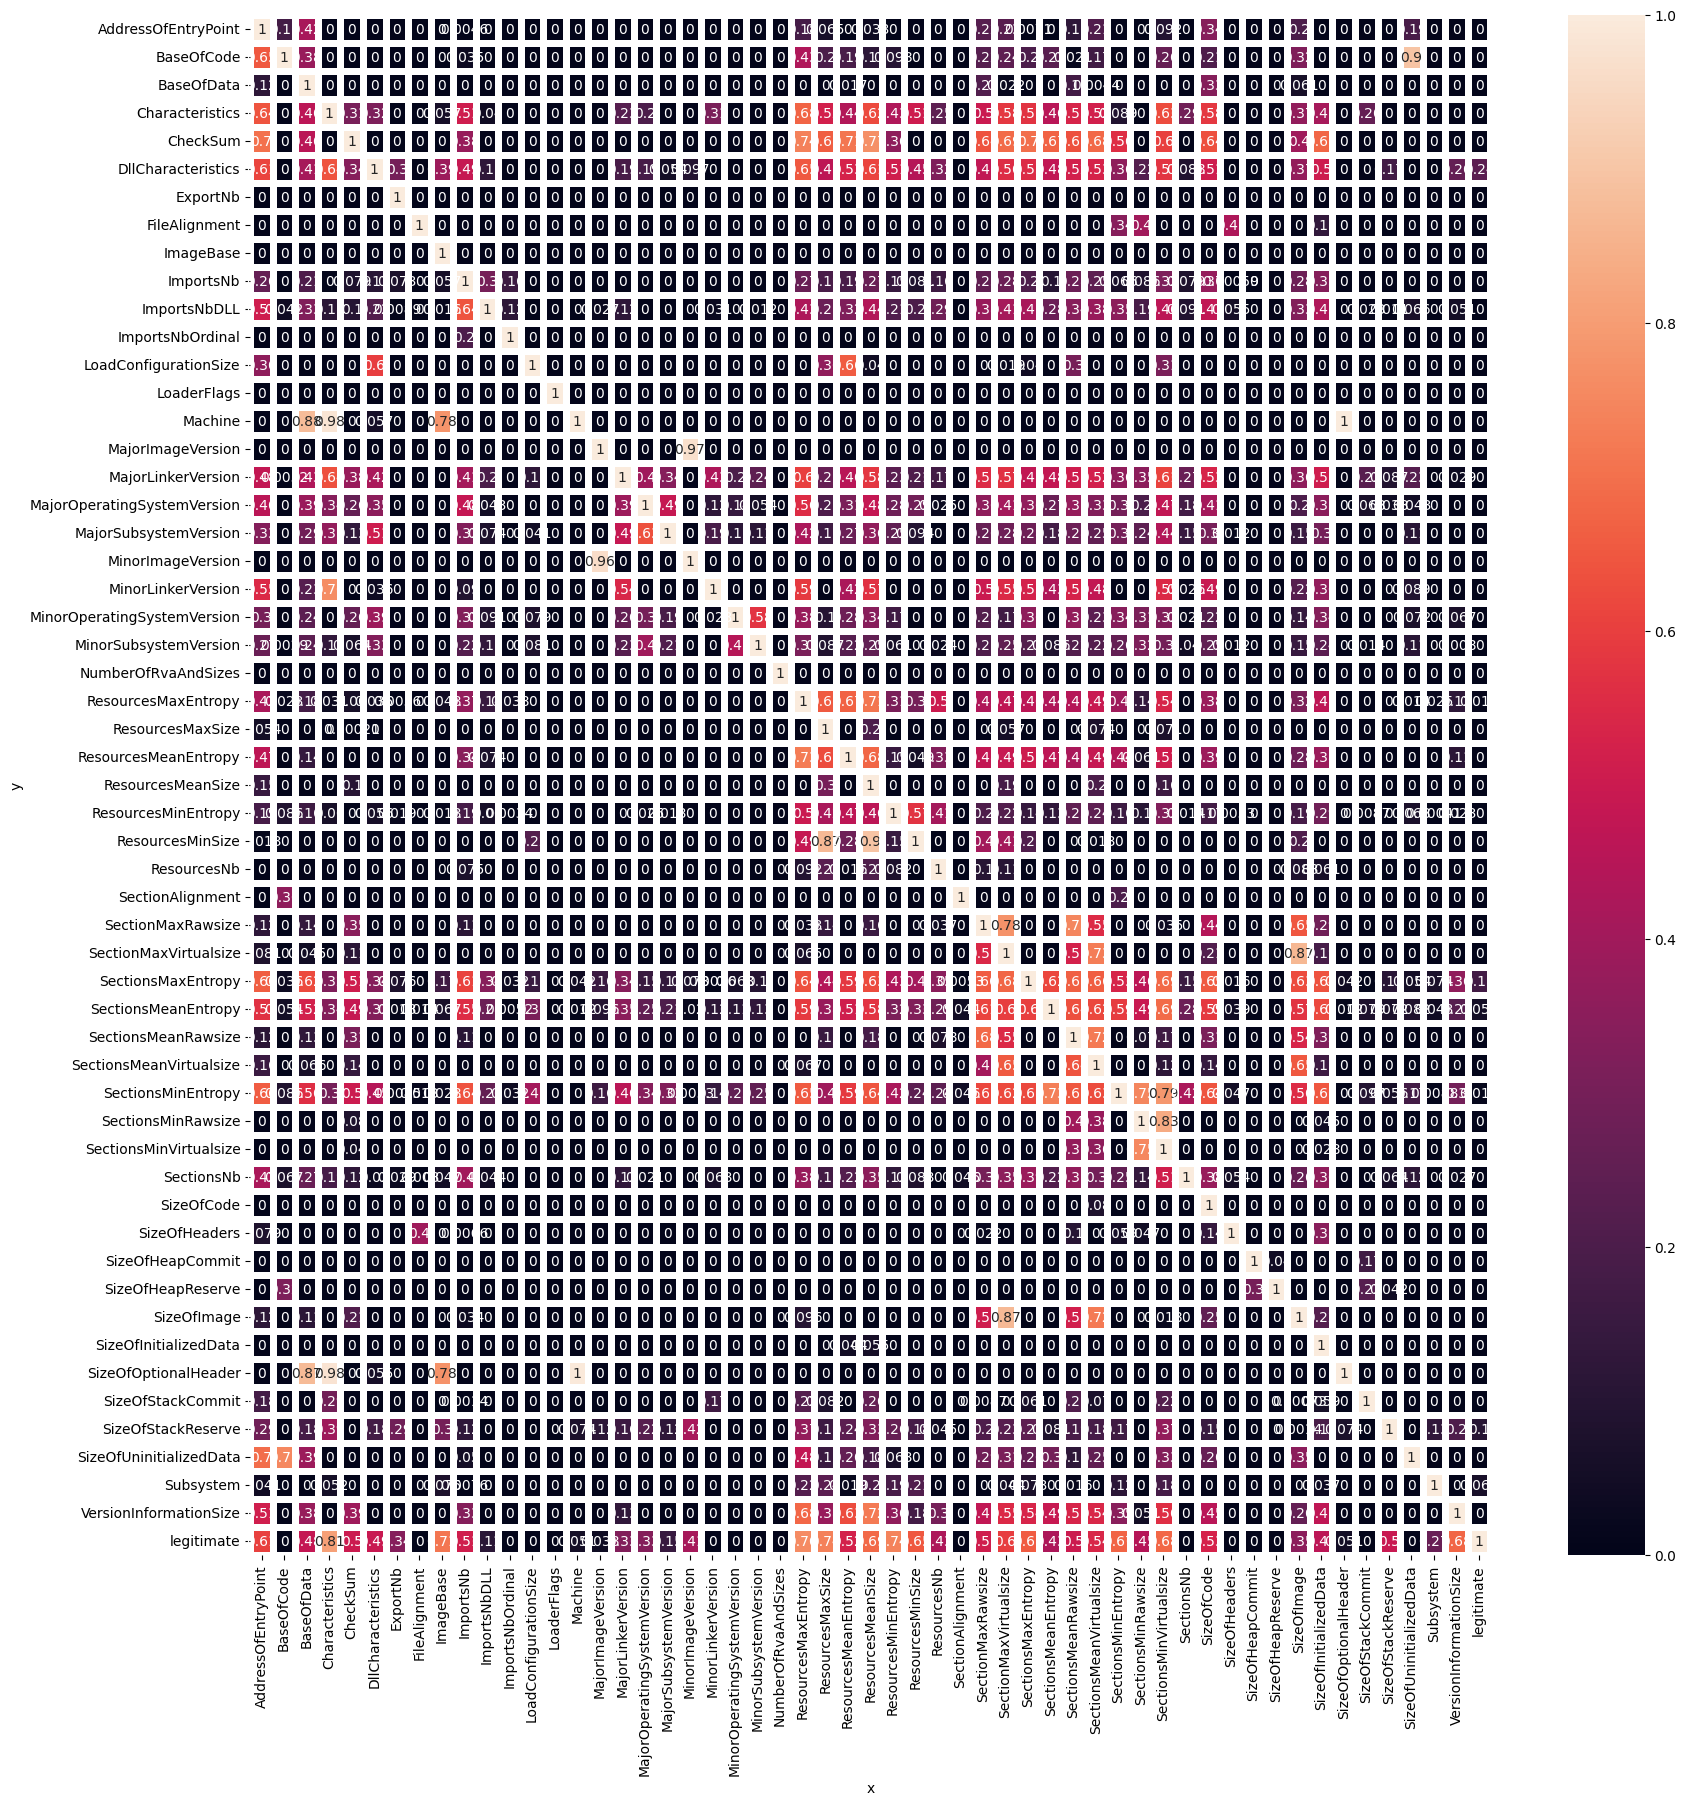

In [42]:
# οπτικοποίηση αποτελεσμάτων πίνακα pps
plt.figure(figsize=(20,20))
matrix_data=pps.matrix(data)[['x','y','ppscore']].pivot(columns='x',index='y',values='ppscore')
sns.heatmap(matrix_data,vmin=0, vmax=1,linewidths=5.0, annot=True)
plt.show()


